In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import json
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re, unicodedata
import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabaz_score
from rake_nltk import Metric, Rake
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_csv('whole_sentence_level.csv', index_col=False).drop(['Unnamed: 0', 'trainOrtest'],axis=1)

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8389152 entries, 0 to 8389151
Data columns (total 4 columns):
aspect    object
group     object
id        object
text      object
dtypes: object(4)
memory usage: 256.0+ MB


,aspect,group,id,text
0,[],Abdominal_Disorders,Abdominal_Disorders--12291-0-1,i be 34 have have a stoma since 28. it have ru...
1,[],Abdominal_Disorders,Abdominal_Disorders--12291-0-2,there be no help for us we be on our own compl...
2,[],Abdominal_Disorders,Abdominal_Disorders--12291-1-1,it be the embarrasment or other people embarra...
3,[],Abdominal_Disorders,Abdominal_Disorders--12291-1-2,etc .
4,[],Abdominal_Disorders,Abdominal_Disorders--12291-2-1,because of ruby rise .


In [7]:
stop_words_list = ["he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "a", "an", "the", "and", "of", "at", "by", "for", "with", "about", "into", "through", "during", "to", "from", "then", "once", "here", "there", "both", "each",  "some", "such","own", "than", "don", "now"]
Tfidf_vectorizer = TfidfVectorizer(max_features=5000,
                                   min_df=2, 
#                                    ngram_range=(1, 3),
                                   analyzer='word',
                                   stop_words = stop_words_list)

vectorizer = Tfidf_vectorizer.fit(df["text"])

In [8]:
text_vectors = vectorizer.transform(df[df.group == 'Abdominal_Disorders']["text"]).toarray()

In [9]:
silhouette_avg = []
ch_score =[]
range_n_clusters = range(2,21)
for n_clusters in range_n_clusters:
    clusterer  = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)
    cluster_labels = clusterer.fit_predict(text_vectors)
    silhouette_avg.append(silhouette_score(text_vectors, cluster_labels))
    ch_score.append(calinski_harabaz_score(text_vectors, cluster_labels)) 
    print ('k = ', n_clusters)

KeyboardInterrupt: 

####  Calinski-Harabasz scores for clustering

Text(0, 0.5, 'CH index')

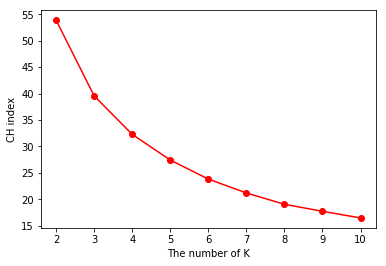

In [432]:
x = np.arange(2,21,1)
plt.plot(x, ch_score,'ro-')
plt.xlabel('The number of K')
plt.ylabel('CH index')

####  Silhouette scores for clustering

Text(0, 0.5, 'The average silhouette_score')

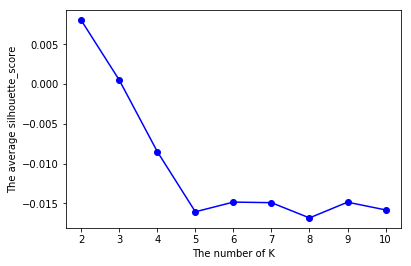

In [433]:
# Silhouette scores for clustering
x = np.arange(2,21,1)
plt.plot(x, silhouette_avg,'bo-')
plt.xlabel('The number of K')
plt.ylabel('The average silhouette_score')

In [9]:
best_k = 2
best_clusterer  = KMeans(n_clusters=2, random_state=0, n_jobs=-1)
cluster_labels = best_clusterer.fit_predict(text_vectors)


In [10]:
cluster_text = {}
for index, clsuter_number in enumerate(cluster_labels):
    if cluster_text.__contains__(clsuter_number):
        cluster_text[clsuter_number]["text"] += " " + df["text"].iloc[index]
    else:
        cluster_text[clsuter_number] = {}
        cluster_text[clsuter_number]["text"] = df["text"].iloc[index]                                  

In [11]:
from nltk.corpus import stopwords
def load_stop_words(stop_word_file):
    """
    Utility function to load stop words from a file and return as a list of words
    @param stop_word_file Path and file name of a file containing stop words.
    @return list A list of stop words.
    """
    stop_words = []
    for line in open(stop_word_file):
        if line.strip()[0:1] != "#":
            for word in line.split():  # in case more than one per line
                stop_words.append(word)
    return stop_words

In [12]:
def gramfreq(text,n,num):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    return df.sort_values(["frequency"],ascending=[0])[:num]

def gram_table(input_dic, gram, length):
    out = pd.DataFrame(index=None)
    for i in gram:
        for num_cluster in range(len(input_dic)):
            r = Rake(min_length=1, max_length=i, stopwords=stopwords_list)
            r.extract_keywords_from_text(cluster_text[num_cluster]['text'])
            table = pd.DataFrame(r.get_ranked_phrases()[:length])
            table.columns = ["Cluster {0}: {1}-Gram Keywords".format(num_cluster, i)]
            out = pd.concat([out, table], axis=1)
    return out

In [13]:
stoppath = "SmartStoplist.txt"
stopwords_list = load_stop_words(stoppath)

In [15]:
gram_df = gram_table(cluster_text, gram=[1,2, 3, 4], length=100)
gram_df.head(50)

,Cluster 0: 1-Gram Keywords,Cluster 1: 1-Gram Keywords,Cluster 0: 2-Gram Keywords,Cluster 1: 2-Gram Keywords,Cluster 0: 3-Gram Keywords,Cluster 1: 3-Gram Keywords,Cluster 0: 4-Gram Keywords,Cluster 1: 4-Gram Keywords
0,zyrtec,zyprexa,zinc carnosine,zin carosine,tronolane pramoxine hydrochloride,vhl von hippel,omaperazol lanperazol emperazol rinidine,utm sourceforum utm mediumreply
1,zydol,zyban,yummy peach,yum yum,sweatiness wetness leakiness,rectus abdominis succuessfully,keywordsgreenptband qid1552365184 sgateway sr8,indigestions nopar spasmolytic anticholinergic
2,zucchini,zumba,yin yang,wne tback,otilonium bromide spasmomen,prague czech republic,gca giant cell arteritis,natrum phos 6x 12x
3,zpack,zucchini,yelp ow,wireless transmission,oat cookies dessert,lanperazol emperazol rinidine,jad pain aound wjat,duodendal bulb inflamated bulbitis
4,zopiclone,zpack,yah bso,wheened themself,315 thous mcl,kapal bhati pranayam,althaea officinalis marshmallow leaf,handouts chronic 20abdominal 20pain
5,zoom,zoton,wrist band,werthers originals,lyloriui kit amoxicilline,efprfnswffhsfy2ndi0 posterid163022 rnd0,el pollo loco salad,dawnregina dawnregina 4 dawnregina
6,zombie,zophran,wive tale,waterery stall,mast cell activation,bla bla bla,equate clearlax osomotic laxative,osme anti depressiavant medc
7,zoloft,zoom,witch hazel,wasp buzz,dull paine especilly,autopsy ensue lawsuit,buscas 10 mg medazepam,touble swalowing difrent type
8,zofran,zoolinger,wholly unadvisable,vommiting forcely,national screen programme,ashkenazi jewish heritage,loin pain haematuria syndrome,john decaestecker janusz jankowski
9,zoey112,zoo12313,wheel barrow,vogel boldocynara,amino acid taurine,foc yo tedt,annual ce driver hydrocodone,haem arginate aust canada


In [440]:
out_path = 'Abdominal_Disorders_Clustering_Keywords.csv'
gram_df.to_csv(out_path, index=False)